In [3]:
import os
train_dir  = '../input/100-bird-species/train'
valid_dir ='../input/100-bird-species/valid'
test_dir ='../input/100-bird-species/test'
classes = os.listdir(train_dir)
classes

['WATTLED CURASSOW',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'DUSKY LORY',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'BLACK THROATED BUSHTIT',
 'CHINESE POND HERON',
 'AFRICAN EMERALD CUCKOO',
 'COMMON LOON',
 'COMMON POORWILL',
 'FIORDLAND PENGUIN',
 'SUPERB STARLING',
 'CUBAN TODY',
 'TASMANIAN HEN',
 'BLACK SWAN',
 'WATTLED LAPWING',
 'RED NAPED TROGON',
 'AMERICAN PIPIT',
 'EASTERN TOWE

In [4]:
import torchvision.transforms as tt

transform = tt.Compose([tt.Resize((224, 224)), tt.ToTensor(),tt.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(train_dir, transform = transform)
valid_dataset = ImageFolder(valid_dir, transform = transform)
test_dataset = ImageFolder(test_dir, transform = transform)

from torch.utils.data.dataloader import DataLoader
batch_size = 32

train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_dl = DataLoader(valid_dataset, batch_size*2, num_workers=4, pin_memory=True)

classes = valid_dataset.classes

CASPIAN TERN


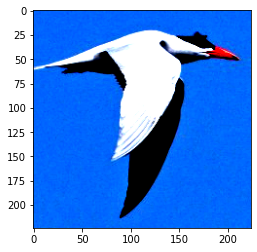

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_example(data):
    [img, label] = data
    print(classes[label])
    plt.imshow(img.permute(1, 2, 0))
    
from random import randrange
image_number = randrange(20000)
show_example(train_dataset[image_number])

In [6]:
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

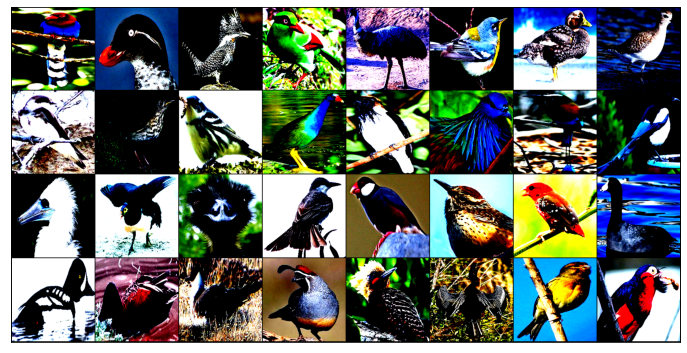

In [7]:
show_batch(train_dl)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, Dropout, BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(400,activation='softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ["accuracy"])
model.summary()

2022-08-16 10:20:00.233129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 10:20:00.234115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 10:20:00.234717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-16 10:20:00.235557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [15]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
h1=model.fit(train_ds,epochs= 15, batch_size=32)

Found 58388 images belonging to 400 classes.


2022-08-16 10:20:19.345552: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-08-16 10:20:20.602687: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1825/1825 [==============================] - 365s 199ms/step - loss: 3.9648 - accuracy: 0.1978
Epoch 2/15
1825/1825 [==============================] - 146s 80ms/step - loss: 2.3950 - accuracy: 0.4511
Epoch 3/15
1825/1825 [==============================] - 146s 80ms/step - loss: 1.8740 - accuracy: 0.5519
Epoch 4/15
1825/1825 [==============================] - 149s 81ms/step - loss: 1.5819 - accuracy: 0.6117
Epoch 5/15
1825/1825 [==============================] - 144s 79ms/step - loss: 1.3885 - accuracy: 0.6491
Epoch 6/15
1825/1825 [==============================] - 148s 81ms/step - loss: 1.2452 - accuracy: 0.6808
Epoch 7/15
1825/1825 [==============================] - 147s 81ms/step - loss: 1.1282 - accuracy: 0.7047
Epoch 8/15
1825/1825 [==============================] - 146s 80ms/step - loss: 1.0327 - accuracy: 0.7269
Epoch 9/15
1825/1825 [==============================] - 145s 79ms/step - loss: 0.9632 - accuracy: 0.7417
Epoch 10/15
1825/1825 [==============================] - 149s 82m

In [37]:
from keras.models import load_model

model.save('my_model.h5')

In [39]:
h1=model.fit(train_ds,epochs= 15, batch_size=32)

Epoch 1/15
1825/1825 [==============================] - 149s 82ms/step - loss: 0.6274 - accuracy: 0.8168
Epoch 2/15
1825/1825 [==============================] - 156s 86ms/step - loss: 0.5947 - accuracy: 0.8249
Epoch 3/15
1825/1825 [==============================] - 147s 81ms/step - loss: 0.5683 - accuracy: 0.8311
Epoch 4/15
1825/1825 [==============================] - 148s 81ms/step - loss: 0.5406 - accuracy: 0.8394
Epoch 5/15
1825/1825 [==============================] - 145s 80ms/step - loss: 0.5227 - accuracy: 0.8441
Epoch 6/15
1825/1825 [==============================] - 148s 81ms/step - loss: 0.4902 - accuracy: 0.8511
Epoch 7/15
1825/1825 [==============================] - 145s 79ms/step - loss: 0.4825 - accuracy: 0.8532
Epoch 8/15
1825/1825 [==============================] - 145s 79ms/step - loss: 0.4611 - accuracy: 0.8599
Epoch 9/15
1825/1825 [==============================] - 154s 84ms/step - loss: 0.4473 - accuracy: 0.8632
Epoch 10/15
1825/1825 [==============================] 

In [40]:
h1=model.fit(train_ds,epochs= 5, batch_size=32)

Epoch 1/5
1825/1825 [==============================] - 141s 77ms/step - loss: 0.3566 - accuracy: 0.8898
Epoch 2/5
1825/1825 [==============================] - 142s 78ms/step - loss: 0.3528 - accuracy: 0.8899
Epoch 3/5
1825/1825 [==============================] - 144s 79ms/step - loss: 0.3377 - accuracy: 0.8947
Epoch 4/5
1825/1825 [==============================] - 148s 81ms/step - loss: 0.3302 - accuracy: 0.8966
Epoch 5/5
1825/1825 [==============================] - 148s 81ms/step - loss: 0.3293 - accuracy: 0.8968


In [41]:
h1=model.fit(train_ds,epochs= 3, batch_size=32)
model.save('my_model1.h5')

Epoch 1/3
1825/1825 [==============================] - 143s 78ms/step - loss: 0.3149 - accuracy: 0.9009
Epoch 2/3
1825/1825 [==============================] - 145s 80ms/step - loss: 0.3078 - accuracy: 0.9025
Epoch 3/3
1825/1825 [==============================] - 144s 79ms/step - loss: 0.3023 - accuracy: 0.9052


In [42]:
import os
os.listdir("./")

['my_model.h5',
 'saved_model.pb',
 '.\\internship.h5',
 'variables',
 '.\\',
 'keras_metadata.pb',
 'internship.h5',
 'my_model1.h5',
 'assets',
 '.virtual_documents',
 'internship.pth',
 '__notebook_source__.ipynb']

<a href="./my_model1.h5"> Download File </a>

In [68]:
test_ds = generator.flow_from_directory(test_dir,target_size=(224, 224),batch_size=32)
test_loss, test_acc = model.evaluate(test_ds, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 12s 233ms/step - loss: 0.8422 - accuracy: 0.8194
test acc:  81.94 %


In [1]:
import tensorflow
from tensorflow import keras
model = keras.models.load_model('../input/cnnbirds/cnnmodel.h5')
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory('../input/100-bird-species/train',target_size=(224, 224),batch_size=32)
valid_ds = generator.flow_from_directory('../input/100-bird-species/valid',target_size=(224, 224),batch_size=32)
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
h1=model.fit(train_ds,epochs= 20,validation_data=valid_ds,workers=10,use_multiprocessing=True)

2022-08-17 10:00:18.933807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 10:00:19.063283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 10:00:19.064076: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 10:00:19.065695: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


2022-08-17 10:00:30.723827: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-08-17 10:00:34.160982: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1825/1825 [==============================] - 196s 102ms/step - loss: 0.1640 - accuracy: 0.9486 - val_loss: 0.8861 - val_accuracy: 0.8200
Epoch 2/20
1825/1825 [==============================] - 179s 97ms/step - loss: 0.1347 - accuracy: 0.9569 - val_loss: 0.8926 - val_accuracy: 0.8225
Epoch 3/20
1825/1825 [==============================] - 182s 98ms/step - loss: 0.1214 - accuracy: 0.9619 - val_loss: 0.8987 - val_accuracy: 0.8230
Epoch 4/20
1825/1825 [==============================] - 183s 99ms/step - loss: 0.1153 - accuracy: 0.9641 - val_loss: 0.9021 - val_accuracy: 0.8225
Epoch 5/20
1825/1825 [==============================] - 181s 99ms/step - loss: 0.1091 - accuracy: 0.9657 - val_loss: 0.9105 - val_accuracy: 0.8265
Epoch 6/20
1825/1825 [==============================] - 175s 95ms/step - loss: 0.0985 - accuracy: 0.9686 - val_loss: 0.9379 - val_accuracy: 0.8235
Epoch 7/20
1825/1825 [==============================] - 165s 89ms/step - loss: 0.0982 - accuracy: 0.9683 - val_loss: 0.9415 - va

In [2]:
test_ds = generator.flow_from_directory('../input/100-bird-species/test',target_size=(224, 224),batch_size=32)
test_loss, test_acc = model.evaluate(test_ds)
print('test acc: ', round(test_acc*100, 2),  '%')

Found 2000 images belonging to 400 classes.
63/63 [==============================] - 14s 217ms/step - loss: 0.7713 - accuracy: 0.8585
test acc:  85.85 %


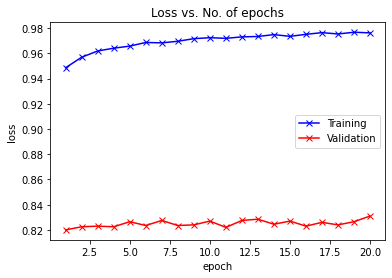

In [12]:
import matplotlib.pyplot as plt
def plot_losses(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
#     train_losses = [x['train_loss'] for x in history.history]
#     val_losses = [x['val_loss'] for x in history.history]
    plt.plot(epochs,acc, '-bx')
    plt.plot(epochs,val_acc, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(h1)

In [13]:
model.save('my_model.h5',overwrite=True)

In [14]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
h1=model.fit(train_ds,epochs= 10,validation_data=valid_ds,workers=10,use_multiprocessing=True)

Epoch 1/10
1825/1825 [==============================] - 228s 124ms/step - loss: 0.0669 - accuracy: 0.9785 - val_loss: 1.0288 - val_accuracy: 0.8330
Epoch 2/10
1825/1825 [==============================] - 222s 120ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 1.0309 - val_accuracy: 0.8315
Epoch 3/10
1825/1825 [==============================] - 200s 108ms/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 1.0336 - val_accuracy: 0.8310
Epoch 4/10
1825/1825 [==============================] - 254s 138ms/step - loss: 0.0651 - accuracy: 0.9791 - val_loss: 1.0366 - val_accuracy: 0.8295
Epoch 5/10
1825/1825 [==============================] - 220s 119ms/step - loss: 0.0630 - accuracy: 0.9793 - val_loss: 1.0343 - val_accuracy: 0.8335
Epoch 6/10
1825/1825 [==============================] - 230s 125ms/step - loss: 0.0633 - accuracy: 0.9797 - val_loss: 1.0432 - val_accuracy: 0.8290
Epoch 7/10
1825/1825 [==============================] - 225s 122ms/step - loss: 0.0639 - accuracy: 0.9799 - val_

In [17]:
model.compile(optimizer=keras.optimizers.Adam(2e-6),loss='categorical_crossentropy',metrics=['accuracy'])
h1=model.fit(train_ds,epochs= 5,validation_data=valid_ds,workers=10,use_multiprocessing=True)

Epoch 1/5
1825/1825 [==============================] - 228s 124ms/step - loss: 0.0588 - accuracy: 0.9811 - val_loss: 1.0349 - val_accuracy: 0.8325
Epoch 2/5
1825/1825 [==============================] - 232s 126ms/step - loss: 0.0634 - accuracy: 0.9798 - val_loss: 1.0455 - val_accuracy: 0.8300
Epoch 3/5
1825/1825 [==============================] - 206s 112ms/step - loss: 0.0621 - accuracy: 0.9798 - val_loss: 1.0455 - val_accuracy: 0.8310
Epoch 4/5
1825/1825 [==============================] - 201s 109ms/step - loss: 0.0618 - accuracy: 0.9803 - val_loss: 1.0385 - val_accuracy: 0.8320
Epoch 5/5
1825/1825 [==============================] - 214s 116ms/step - loss: 0.0617 - accuracy: 0.9800 - val_loss: 1.0383 - val_accuracy: 0.8315


In [18]:
model.save('my_model1.h5',overwrite=True)

In [19]:
test_ds = generator.flow_from_directory('../input/100-bird-species/test',target_size=(224, 224),batch_size=32)
test_loss, test_acc = model.evaluate(test_ds)
print('test acc: ', round(test_acc*100, 2),  '%')

Found 2000 images belonging to 400 classes.
63/63 [==============================] - 7s 111ms/step - loss: 0.7618 - accuracy: 0.8590
test acc:  85.9 %


<a href="./my_model1.h5"> Download File </a>